<a href="https://colab.research.google.com/github/PoojaGunagi/GenAI/blob/main/Gemini_flash_latest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Get started with the Gemini API: Python

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://ai.google.dev/gemini-api/docs/get-started/python"><img src="https://ai.google.dev/static/site-assets/images/docs/notebook-site-button.png" height="32" width="32" />View on Google AI</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/gemini-api/docs/get-started/python.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/google/generative-ai-docs/blob/main/site/en/gemini-api/docs/get-started/python.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

This quickstart demonstrates how to use the Python SDK for the Gemini API, which gives you access to Google's Gemini large language models. In this quickstart, you will learn how to:

1. Set up your development environment and API access to use Gemini.
2. Generate text responses from text inputs.
3. Generate text responses from multimodal inputs (text and images).
4. Use Gemini for multi-turn conversations (chat).
5. Use embeddings for large language models.

## Prerequisites

You can run this quickstart in [Google Colab](https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/gemini-api/docs/get-started/python.ipynb), which runs this notebook directly in the browser and does not require additional environment configuration.

Alternatively, to complete this quickstart locally, ensure that your development environment meets the following requirements:

-  Python 3.9+
-  An installation of `jupyter` to run the notebook.

## Setup

### Step 1: Install the Python SDK

The Python SDK for the Gemini API, is contained in the [`google-generativeai`](https://pypi.org/project/google-generativeai/) package. Install the dependency using pip:

In [1]:
!pip install -q -U google-generativeai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.7/150.7 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.1/679.1 kB 18.2 MB/s eta 0:00:00


### Step 2: Import packages

In [2]:
import pathlib
import textwrap

import google.generativeai as genai

from IPython.display import display
from IPython.display import Markdown


def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

### Step 3: Setup your API key

Before you can use the Gemini API, you must first obtain an API key. If you don't already have one, create a key with one click in Google AI Studio.

<a class="button button-primary" href="https://makersuite.google.com/app/apikey" target="_blank" rel="noopener noreferrer">Get an API key</a>

In Colab, add the key to the secrets manager under the "🔑" in the left panel. Give it the name `GOOGLE_API_KEY`.

Once you have the API key, pass it to the SDK. You can do this in two ways:

* Put the key in the `GOOGLE_API_KEY` environment variable (the SDK will automatically pick it up from there).
* Pass the key to `genai.configure(api_key=...)`

In [4]:
# Used to securely store your API key
from google.colab import userdata
# Or use `os.getenv('GOOGLE_API_KEY')` to fetch an environment variable.
GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')

genai.configure(api_key=GOOGLE_API_KEY)

## Step 4: List models

Now you're ready to call the Gemini API. Use `list_models` to see the available Gemini models:

* `gemini-pro`: optimized for text-only prompts.
* `gemini-pro-vision`: optimized for text-and-images prompts.

In [5]:
for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(m.name)

models/gemini-1.0-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-latest
models/gemini-1.0-pro-vision-latest
models/gemini-1.5-flash-latest
models/gemini-1.5-pro-latest
models/gemini-pro
models/gemini-pro-vision


Note: For detailed information about the available models, including their capabilities and rate limits, see [Gemini models](https://ai.google.dev/models/gemini). There are options for requesting [rate limit increases](https://ai.google.dev/docs/increase_quota). The rate limit for Gemini-Pro models is 60 requests per minute (RPM).

The `genai` package also supports the PaLM  family of models, but only the Gemini models support the generic, multimodal capabilities of the `generateContent` method.

## Step 5: Generate text from text inputs

For text-only prompts, use the `gemini-pro` model:

In [19]:
model = genai.GenerativeModel('gemini-1.5-flash-latest')

The `generate_content` method can handle a wide variety of use cases, including multi-turn chat and multimodal input, depending on what the underlying model supports. The available models only support text and images as input, and text as output.

In the simplest case, you can pass a prompt string to the <a href="https://ai.google.dev/api/python/google/generativeai/GenerativeModel#generate_content"><code>GenerativeModel.generate_content</code></a> method:

In [20]:
%%time
response = model.generate_content("What is the meaning of life?")

CPU times: user 57.5 ms, sys: 7.84 ms, total: 65.3 ms
Wall time: 4.03 s


In simple cases, the `response.text` accessor is all you need. To display formatted Markdown text, use the `to_markdown` function:

In [21]:
response.text

"As a large language model, I don't have personal experiences or beliefs to draw on, so I can't tell you the meaning of life. The meaning of life is a profound and personal question that has been pondered by philosophers and individuals for centuries. There is no single, universally accepted answer. \n\nHere's what I can offer:\n\n* **It's a question for you to explore:** The meaning of life is a journey of self-discovery.  It's about finding what gives your life purpose and fulfillment.  \n* **It can be found in many places:**  Some people find meaning in their relationships, their work, their faith, their creative pursuits, or their service to others.  There is no right or wrong answer.\n* **It can change over time:**  What gives your life meaning at one stage might not be as important later on.  \n\nHere are some questions that might help you explore the meaning of life:\n\n* What are my values?\n* What makes me happy?\n* What do I want to leave behind?\n* What is my purpose?\n\nUlt

In [22]:
to_markdown(response.text)

> As a large language model, I don't have personal experiences or beliefs to draw on, so I can't tell you the meaning of life. The meaning of life is a profound and personal question that has been pondered by philosophers and individuals for centuries. There is no single, universally accepted answer. 
> 
> Here's what I can offer:
> 
> * **It's a question for you to explore:** The meaning of life is a journey of self-discovery.  It's about finding what gives your life purpose and fulfillment.  
> * **It can be found in many places:**  Some people find meaning in their relationships, their work, their faith, their creative pursuits, or their service to others.  There is no right or wrong answer.
> * **It can change over time:**  What gives your life meaning at one stage might not be as important later on.  
> 
> Here are some questions that might help you explore the meaning of life:
> 
> * What are my values?
> * What makes me happy?
> * What do I want to leave behind?
> * What is my purpose?
> 
> Ultimately, the meaning of life is up to you to define. 


If the API failed to return a result, use `GenerateContentResponse.prompt_feedback` to see if it was blocked due to safety concerns regarding the prompt.

Gemini can generate multiple possible responses for a single prompt. These possible responses are called `candidates`, and you can review them to select the most suitable one as the response.

View the response candidates with <a href="https://ai.google.dev/api/python/google/ai/generativelanguage/GenerateContentResponse#candidates"><code>GenerateContentResponse.candidates</code></a>:

In [23]:
response.prompt_feedback

In [24]:
response.candidates

[content {
  parts {
    text: "As a large language model, I don\'t have personal experiences or beliefs to draw on, so I can\'t tell you the meaning of life. The meaning of life is a profound and personal question that has been pondered by philosophers and individuals for centuries. There is no single, universally accepted answer. \n\nHere\'s what I can offer:\n\n* **It\'s a question for you to explore:** The meaning of life is a journey of self-discovery.  It\'s about finding what gives your life purpose and fulfillment.  \n* **It can be found in many places:**  Some people find meaning in their relationships, their work, their faith, their creative pursuits, or their service to others.  There is no right or wrong answer.\n* **It can change over time:**  What gives your life meaning at one stage might not be as important later on.  \n\nHere are some questions that might help you explore the meaning of life:\n\n* What are my values?\n* What makes me happy?\n* What do I want to leave b

By default, the model returns a response after completing the entire generation process. You can also stream the response as it is being generated, and the model will return chunks of the response as soon as they are generated.

To stream responses, use <a href="https://ai.google.dev/api/python/google/generativeai/GenerativeModel#generate_content"><code>GenerativeModel.generate_content(..., stream=True)</code></a>.

In [25]:
%%time
response = model.generate_content("What is the meaning of life?", stream=True)

CPU times: user 79.4 ms, sys: 8.88 ms, total: 88.3 ms
Wall time: 6.25 s


In [26]:
for chunk in response:
  print(chunk.text)
  print("_"*80)

The
________________________________________________________________________________
 meaning of life is a question that has been pondered by philosophers and individuals for centuries
________________________________________________________________________________
. There is no single, universally accepted answer. 

Here are some different
________________________________________________________________________________
 perspectives on the meaning of life:

**Philosophical Perspectives:**

* **Nihilism:**  Life has no inherent meaning or purpose. 
*
________________________________________________________________________________
 **Existentialism:**  Individuals create their own meaning in a meaningless world.
* **Absurdism:**  Life is inherently absurd and we should
________________________________________________________________________________
 embrace the absurdity.
* **Hedonism:**  The pursuit of pleasure and happiness is the ultimate goal.
* **Utilitarianism:**  The goal is to m

When streaming, some response attributes are not available until you've iterated through all the response chunks. This is demonstrated below:

In [27]:
response = model.generate_content("What is the meaning of life?", stream=True)

In [28]:
response.prompt_feedback

In [29]:
try:
  response.text
except Exception as e:
  print(f'{type(e).__name__}: {e}')

IncompleteIterationError: Please let the response complete iteration before accessing the final accumulated
attributes (or call `response.resolve()`)


## Generate text from image and text inputs

Gemini provides a multimodal model (`gemini-pro-vision`) that accepts both text and images and inputs. The `GenerativeModel.generate_content` API is designed to handle multimodal prompts and returns a text output.

Let's include an image:

In [34]:
!curl -o image.jpg https://as1.ftcdn.net/v2/jpg/01/96/80/24/1000_F_196802485_VQxk0qmyPGTq56rKYXGikVGApD3A7v5T.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  387k  100  387k    0     0  3011k      0 --:--:-- --:--:-- --:--:-- 3028k


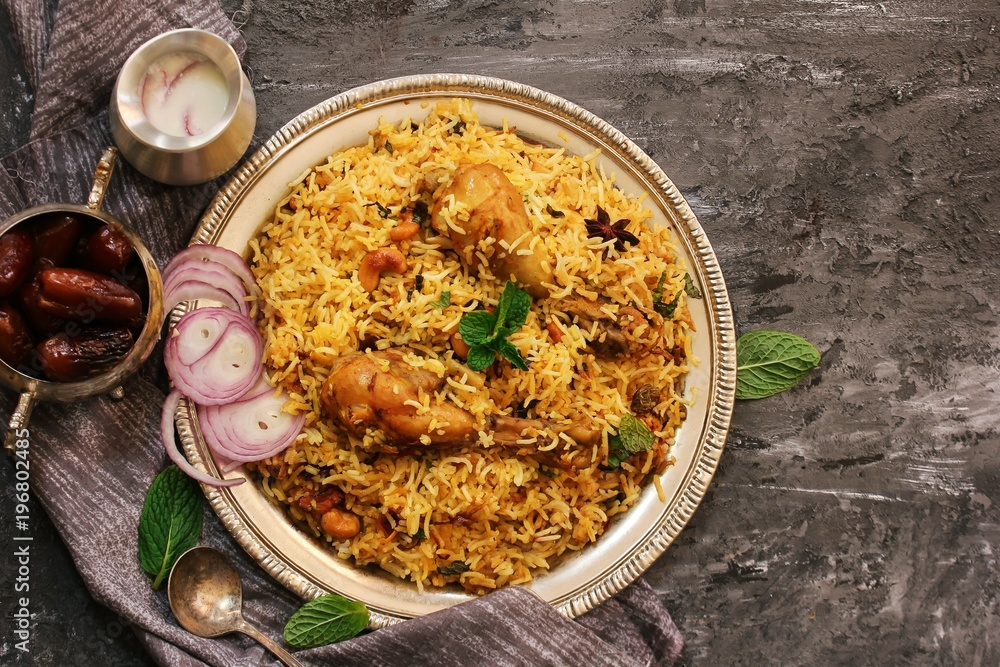

In [35]:
import PIL.Image

img = PIL.Image.open('image.jpg')
img

Use the `gemini-pro-vision` model and pass the image to the model with `generate_content`.

In [38]:
model = genai.GenerativeModel('gemini-1.5-flash-latest')

In [39]:
response = model.generate_content(img)

to_markdown(response.text)

> This image shows a plate of chicken biryani, a popular Indian dish. The biryani is made with rice, chicken, spices, and herbs. It is served with a side of onion rings. There is a small bowl of dates and a bowl of milk beside it. The food looks delicious and fragrant, and it is presented beautifully on a silver platter.

In [40]:
response = model.generate_content(["Write a short, engaging blog post based on this picture. It should include a description of the meal in the photo and talk about my journey meal prepping.", img], stream=True)
response.resolve()

In [41]:
to_markdown(response.text)

> ## The Joy of Meal Prep: A Chicken Biryani Adventure
> 
> This isn't just any meal, this is my latest foray into the wonderful world of meal prepping - a delicious chicken biryani! 
> 
> I'm a busy person, and let's be honest, sometimes cooking just feels like a chore. But I refuse to compromise on delicious, home-cooked meals. That's where meal prepping comes in. It's all about taking a little time on the weekend to cook up a storm and have tasty, healthy food ready to go all week long. 
> 
> This biryani, with its fragrant spices, tender chicken, and perfectly cooked rice, is a true testament to the power of meal prep. It's not just about convenience, it's about taking control of my health and enjoying food that fuels my body and soul. 
> 
> What are some of your favorite meal prep meals? Let me know in the comments below! 


## Chat conversations

Gemini enables you to have freeform conversations across multiple turns. The `ChatSession` class simplifies the process by managing the state of the conversation, so unlike with `generate_content`, you do not have to store the conversation history as a list.

Initialize the chat:

In [42]:
model = genai.GenerativeModel('gemini-1.5-flash-latest')
chat = model.start_chat(history=[])
chat

ChatSession(
    model=genai.GenerativeModel(
        model_name='models/gemini-1.5-flash-latest',
        generation_config={},
        safety_settings={},
        tools=None,
        system_instruction=None,
    ),
    history=[]
)

Note: The vision model `gemini-pro-vision` is not optimized for multi-turn chat.

The `ChatSession.send_message` method returns the same `GenerateContentResponse` type as <a href="https://ai.google.dev/api/python/google/generativeai/GenerativeModel#generate_content"><code>GenerativeModel.generate_content</code></a>. It also appends your message and the response to the chat history:


In [43]:
response = chat.send_message("In one sentence, explain how a computer works to a young child.")
to_markdown(response.text)

> A computer is like a really smart toy that follows instructions you give it, using numbers and lights to make things happen on the screen. 


In [44]:
chat.history

[parts {
   text: "In one sentence, explain how a computer works to a young child."
 }
 role: "user",
 parts {
   text: "A computer is like a really smart toy that follows instructions you give it, using numbers and lights to make things happen on the screen. \n"
 }
 role: "model"]

You can keep sending messages to continue the conversation. Use the `stream=True` argument to stream the chat:

In [45]:
response = chat.send_message("Okay, how about a more detailed explanation to a high schooler?", stream=True)

for chunk in response:
  print(chunk.text)
  print("_"*80)

A
________________________________________________________________________________
 computer works by processing information using a complex system of circuits and software, converting your
________________________________________________________________________________
 inputs into outputs like text, images, and sounds, based on a set of
________________________________________________________________________________
 instructions you provide. 

________________________________________________________________________________


`glm.Content` objects contain a list of `glm.Part` objects that each contain either a text (string) or inline_data (`glm.Blob`), where a blob contains binary data and a `mime_type`. The chat history is available as a list of `glm.Content` objects in `ChatSession.history`:

In [46]:
for message in chat.history:
  display(to_markdown(f'**{message.role}**: {message.parts[0].text}'))

> **user**: In one sentence, explain how a computer works to a young child.

> **model**: A computer is like a really smart toy that follows instructions you give it, using numbers and lights to make things happen on the screen. 


> **user**: Okay, how about a more detailed explanation to a high schooler?

> **model**: A computer works by processing information using a complex system of circuits and software, converting your inputs into outputs like text, images, and sounds, based on a set of instructions you provide. 
